In [1]:
# load python packages
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import IPython
import sklearn
import keras

Using TensorFlow backend.


In [2]:
# load dataset
import scipy.io          
dataset = scipy.io.loadmat('/Users/gustavocarneiro/Documents/courses/Artificial Intelligence 2018/assignment/dataset.mat')

In [3]:
# get training and testing sets
x_train = dataset['train_image']
x_test = dataset['test_image']
y_train = dataset['train_label']
y_test = dataset['test_label']

In [4]:
# print package version 
print('numpy:', np.__version__)
print('scipy:', sp.__version__)
print('matplotlib:', matplotlib.__version__)
print('iPython:', IPython.__version__)
print('scikit-learn:', sklearn.__version__)
print('keras: ', keras.__version__)
import tensorflow as tf
print('Tensorflow: ', tf.__version__)

numpy: 1.13.3
scipy: 1.0.0
matplotlib: 2.1.0
iPython: 6.2.1
scikit-learn: 0.19.1
keras:  2.1.2
Tensorflow:  1.4.0


In [5]:
# import keras packages
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import backend as K

In [6]:
# batch size for gradient descent
batch_size = 32
# number of classes
num_classes = 2
# number of epochs (1 epoch = amount of iterations that covers the whole training set)
epochs = 200 # try a larger number of epochs here (for example 10 or larger)
# input image dimensions
nmb_samples, img_rows, img_cols = x_train.shape[0], x_train.shape[1], x_train.shape[2]
nmb_test_samples = x_test.shape[0]

In [7]:
# adjust training image format
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

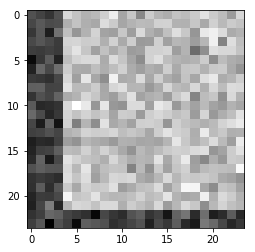

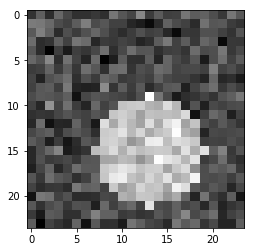

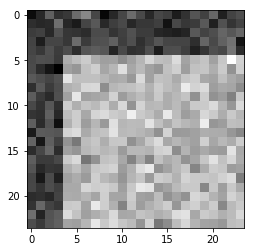

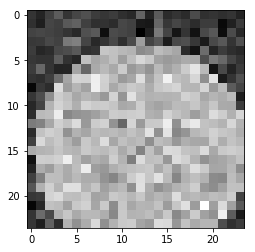

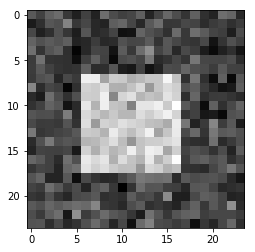

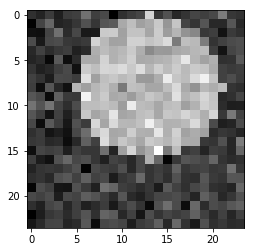

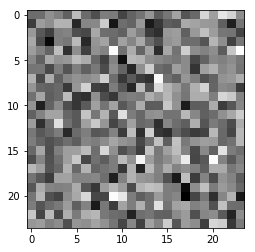

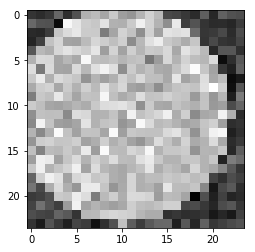

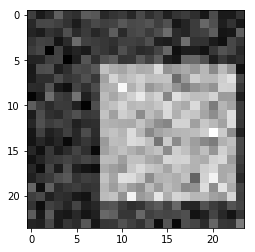

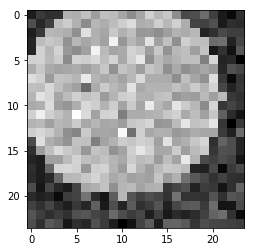

In [8]:
# display some training images
for i in range(10):
    first_image = x_train[i,:,:,0]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((img_rows, img_cols))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [9]:
# type casting and dimensionality transformations
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train.reshape(nmb_samples, img_rows*img_cols)
x_test = x_test.reshape(nmb_test_samples, img_rows*img_cols)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (200, 576)
200 train samples
200 test samples


In [10]:
# convert class vectors to binary class matrices (one hot vectors)
y_train = keras.utils.to_categorical(np.squeeze(y_train), num_classes)
y_test = keras.utils.to_categorical(np.squeeze(y_test), num_classes)

In [11]:
# define MLP model (2 hidden layers with 512 nodes, activated by ReLUs)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(img_rows*img_cols,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
# compile model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [13]:
# training
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))

Train on 200 samples, validate on 200 samples
Epoch 1/200
200/200 [==============================] - 1s 3ms/step - loss: 0.7918 - acc: 0.4700 - val_loss: 1.0047 - val_acc: 0.5000
Epoch 2/200
200/200 [==============================] - 0s 371us/step - loss: 0.6876 - acc: 0.5500 - val_loss: 1.1716 - val_acc: 0.5000
Epoch 3/200
200/200 [==============================] - 0s 464us/step - loss: 0.7363 - acc: 0.5500 - val_loss: 0.6719 - val_acc: 0.5150
Epoch 4/200
200/200 [==============================] - 0s 426us/step - loss: 0.6153 - acc: 0.6900 - val_loss: 0.7287 - val_acc: 0.5000
Epoch 5/200
200/200 [==============================] - 0s 467us/step - loss: 0.6237 - acc: 0.5950 - val_loss: 1.0390 - val_acc: 0.5000
Epoch 6/200
200/200 [==============================] - 0s 440us/step - loss: 0.6386 - acc: 0.6350 - val_loss: 0.8618 - val_acc: 0.5050
Epoch 7/200
200/200 [==============================] - 0s 392us/step - loss: 0.6892 - acc: 0.5800 - val_loss: 0.6221 - val_acc: 0.6450
Epoch 8/200

Epoch 61/200
200/200 [==============================] - 0s 470us/step - loss: 0.0241 - acc: 1.0000 - val_loss: 0.3270 - val_acc: 0.8500
Epoch 62/200
200/200 [==============================] - 0s 386us/step - loss: 0.0238 - acc: 1.0000 - val_loss: 0.3325 - val_acc: 0.8500
Epoch 63/200
200/200 [==============================] - 0s 373us/step - loss: 0.0255 - acc: 1.0000 - val_loss: 0.3307 - val_acc: 0.8500
Epoch 64/200
200/200 [==============================] - 0s 399us/step - loss: 0.0196 - acc: 1.0000 - val_loss: 0.4204 - val_acc: 0.8450
Epoch 65/200
200/200 [==============================] - 0s 361us/step - loss: 0.0282 - acc: 1.0000 - val_loss: 0.3128 - val_acc: 0.8800
Epoch 66/200
200/200 [==============================] - 0s 351us/step - loss: 0.0187 - acc: 1.0000 - val_loss: 0.3419 - val_acc: 0.8450
Epoch 67/200
200/200 [==============================] - 0s 386us/step - loss: 0.2299 - acc: 0.8800 - val_loss: 1.9095 - val_acc: 0.5000
Epoch 68/200
200/200 [==========================

200/200 [==============================] - 0s 428us/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.3233 - val_acc: 0.8850
Epoch 122/200
200/200 [==============================] - 0s 358us/step - loss: 0.0026 - acc: 1.0000 - val_loss: 0.3233 - val_acc: 0.8900
Epoch 123/200
200/200 [==============================] - 0s 457us/step - loss: 0.0025 - acc: 1.0000 - val_loss: 0.3240 - val_acc: 0.8750
Epoch 124/200
200/200 [==============================] - 0s 543us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.3289 - val_acc: 0.8800
Epoch 125/200
200/200 [==============================] - 0s 437us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.3277 - val_acc: 0.8750
Epoch 126/200
200/200 [==============================] - 0s 436us/step - loss: 0.0021 - acc: 1.0000 - val_loss: 0.3316 - val_acc: 0.8750
Epoch 127/200
200/200 [==============================] - 0s 400us/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.3221 - val_acc: 0.8750
Epoch 128/200
200/200 [==============================] 

200/200 [==============================] - 0s 364us/step - loss: 3.7713e-04 - acc: 1.0000 - val_loss: 0.3959 - val_acc: 0.8750
Epoch 181/200
200/200 [==============================] - 0s 359us/step - loss: 3.9076e-04 - acc: 1.0000 - val_loss: 0.3746 - val_acc: 0.8800
Epoch 182/200
200/200 [==============================] - 0s 432us/step - loss: 3.7334e-04 - acc: 1.0000 - val_loss: 0.4089 - val_acc: 0.8650
Epoch 183/200
200/200 [==============================] - 0s 343us/step - loss: 3.3718e-04 - acc: 1.0000 - val_loss: 0.3729 - val_acc: 0.8600
Epoch 184/200
200/200 [==============================] - 0s 346us/step - loss: 3.5832e-04 - acc: 1.0000 - val_loss: 0.3731 - val_acc: 0.8850
Epoch 185/200
200/200 [==============================] - 0s 416us/step - loss: 2.7131e-04 - acc: 1.0000 - val_loss: 0.3648 - val_acc: 0.8750
Epoch 186/200
200/200 [==============================] - 0s 371us/step - loss: 2.7357e-04 - acc: 1.0000 - val_loss: 0.3839 - val_acc: 0.8800
Epoch 187/200
200/200 [====

In [14]:
# print train and test losses and classification accuracies
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 0.000226462746505
Train accuracy: 1.0
Test loss: 0.39157954812
Test accuracy: 0.86


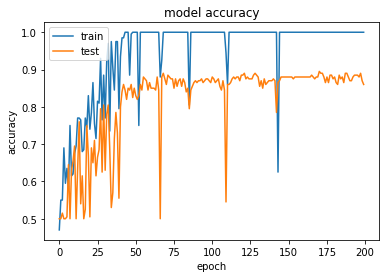

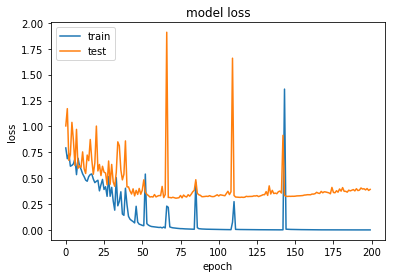

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()